In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Set the style for our plots to make them look nice
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 8)
plt.rcParams["font.size"] = 12

# Define the path to your analysis file
# The filename is the one you provided.
file_path = "outputs/analysis_Phi-4-reasoning-plus_20250618_174908.json"

print(f"Ready to analyze file: {file_path}")

Ready to analyze file: outputs/analysis_Phi-4-reasoning-plus_20250618_174908.json


In [36]:
# Load the JSON data into a pandas DataFrame for easy manipulation

try:
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Convert the list of dictionaries directly into a DataFrame
    df = pd.DataFrame(data)
    avg_variance = df['variance'].mean()
    
    print("File loaded successfully!")
    print(f"Total number of generated tokens: {len(df)}")
    print(f"Average variance: {avg_variance:.2e}")
    
    
    # Display the first few rows to verify the structure
    print("\nData Head:")
    display(df.head())
    
    # Display summary information about the DataFrame
    print("\nData Info:")
    df.info()

except FileNotFoundError:
    print(f"ERROR: The file was not found at {file_path}")
    print("Please make sure the filename and path are correct.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!
Total number of generated tokens: 25443
Average variance: 7.56e-06

Data Head:


step chosen_token  chosen_token_prob  variance       entropy  \
0     1      <think>           0.999999  0.000010  4.433871e-07   
1     2           We           0.994259  0.000010  9.147204e-03   
2     3          are           0.945601  0.000010  1.221373e-01   
3     4        given           0.640603  0.000006  7.180048e-01   
4     5            a           0.691579  0.000007  7.843891e-01   

                                   top_k_predictions  
0  [{'token': '<think>', 'probability': 0.9999986...  
1  [{'token': 'We', 'probability': 0.994259476661...  
2  [{'token': ' are', 'probability': 0.9456008076...  
3  [{'token': ' given', 'probability': 0.64060252...  
4  [{'token': ' a', 'probability': 0.691579163074...


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25443 entries, 0 to 25442
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               25443 non-null  int64  
 1   chosen_token       25443 non-null  object 
 2   chosen_token_prob  25443 non-null  float64
 3   variance           25443 non-null  float64
 4   entropy            25443 non-null  float64
 5   top_k_predictions  25443 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


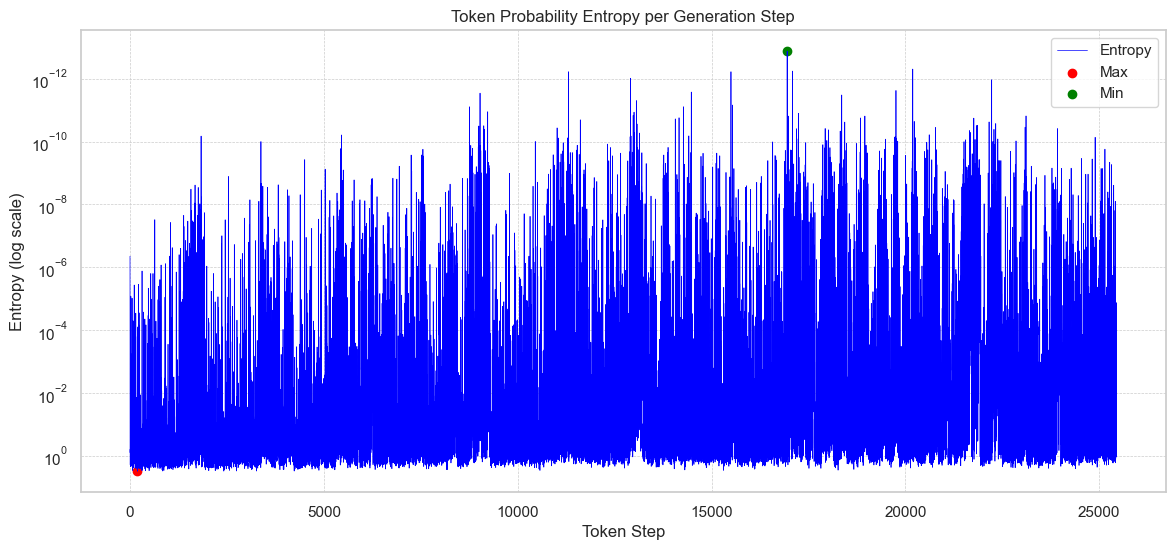

In [46]:
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(14, 6))
    plt.plot(
        df.index,
        df['entropy'],
        label='Entropy',
        color='blue',
        linewidth=0.5  # Make the line thin
    )
    plt.yscale('log')
    plt.gca().invert_yaxis()  # Flip the y-axis
    plt.xlabel('Token Step')
    plt.ylabel('Entropy (log scale)')
    plt.title('Token Probability Entropy per Generation Step')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Highlight max and min variance points
    max_idx = df['entropy'].idxmax()
    min_idx = df['entropy'].idxmin()
    plt.scatter([max_idx], [df.loc[max_idx, 'entropy']], color='red', label='Max')
    plt.scatter([min_idx], [df.loc[min_idx, 'entropy']], color='green', label='Min')
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

In [42]:
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(1400, 6))
    plt.plot(df.index, df['variance'], label='Variance', color='blue')
    plt.yscale('log')
    plt.xlabel('Token Step')
    plt.ylabel('Variance (log scale)')
    plt.title('Token Probability Variance per Generation Step')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Highlight max and min variance points
    max_idx = df['variance'].idxmax()
    min_idx = df['variance'].idxmin()
    plt.scatter([max_idx], [df.loc[max_idx, 'variance']], color='red', label='Max')
    plt.scatter([min_idx], [df.loc[min_idx, 'variance']], color='green', label='Min')
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

In [38]:
# Show the 1st, 5th, and 40th percentile (lowest) variance values in scientific notation

if 'df' in locals() and not df.empty:
    percentiles = [0.01, 0.05, 0.40]
    percentile_labels = ['1st', '5th', '40th']
    values = df['entropy'].quantile(percentiles)
    
    print("Entropy percentiles (lowest):")
    for label, val in zip(percentile_labels, values):
        print(f"{label} percentile: {val:.2e}")
else:
    print("DataFrame 'df' not available. Please run the previous cell successfully.")

Entropy percentiles (lowest):
1st percentile: 8.38e-10
5th percentile: 2.10e-07
40th percentile: 9.79e-02


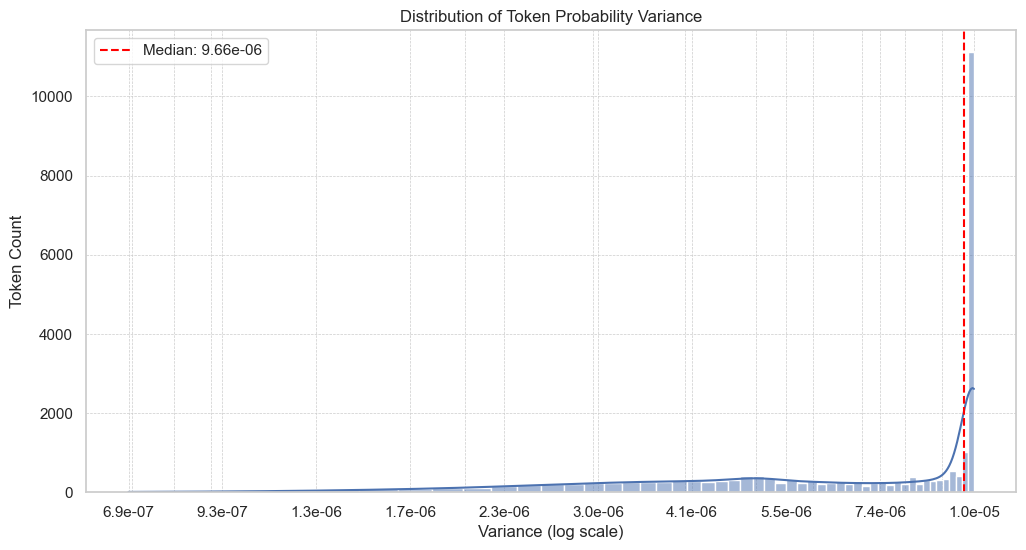

In [34]:
import numpy as np

if 'df' in locals() and not df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['variance'], bins=50, kde=True)
    plt.xscale('log')
    plt.xlabel('Variance (log scale)')
    plt.ylabel('Token Count')
    plt.title('Distribution of Token Probability Variance')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Add more ticks on the log x-axis
    min_var = df['variance'].min()
    max_var = df['variance'].max()
    ticks = np.logspace(np.log10(min_var), np.log10(max_var), num=10)
    plt.xticks(ticks, [f"{t:.1e}" for t in ticks])
    
    # Add median line
    median_var = df['variance'].median()
    plt.axvline(median_var, color='red', linestyle='--', label=f"Median: {median_var:.2e}")
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

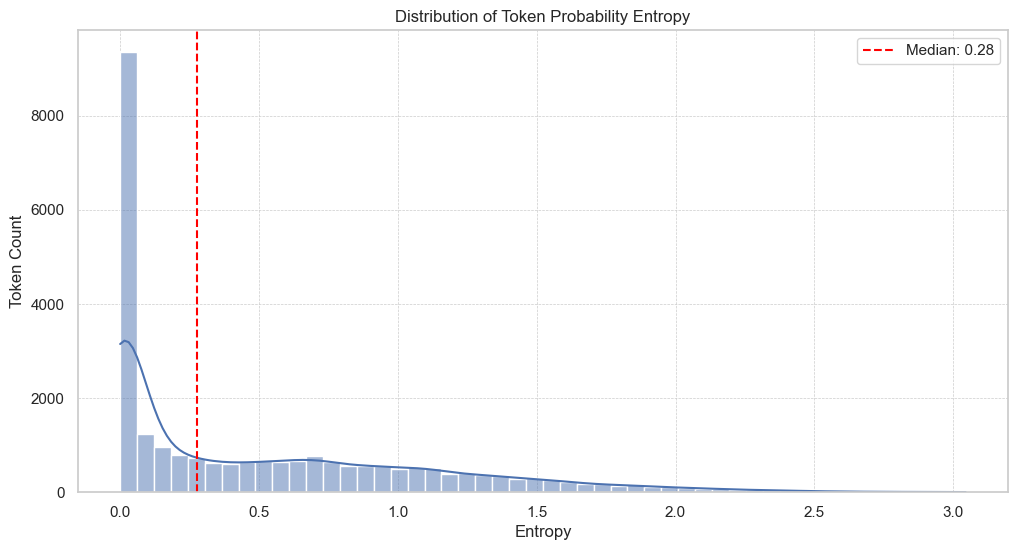

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals() and not df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['entropy'], bins=50, kde=True)
    # plt.xscale('log')  # <-- Removed for linear scale
    plt.xlabel('Entropy')
    plt.ylabel('Token Count')
    plt.title('Distribution of Token Probability Entropy')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Use default linear ticks, or set manually if you want:
    # min_var = df['entropy'].min()
    # max_var = df['entropy'].max()
    # ticks = np.linspace(min_var, max_var, num=10)
    # plt.xticks(ticks, [f"{t:.2f}" for t in ticks])
    
    # Add median line
    median_var = df['entropy'].median()
    plt.axvline(median_var, color='red', linestyle='--', label=f"Median: {median_var:.2f}")
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")